In [19]:
import reservoirpy as rpy

rpy.set_seed(42) 

<img src="Estrutura_ESN.png" alt="estrutura_esn" width="800">

<img src="Nodo_ESN.png" alt="estrutura_esn" width="800">

In [2]:
from reservoirpy.nodes import Reservoir

reservoir = Reservoir(100, lr=0.5, sr=0.9)

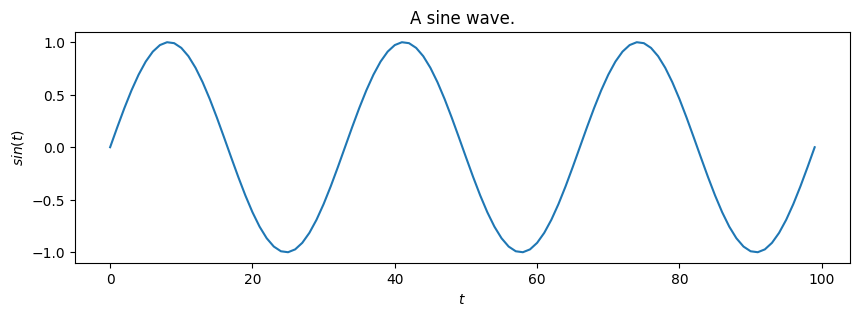

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = np.sin(np.linspace(0, 6*np.pi, 100)).reshape(-1, 1)

plt.figure(figsize=(10, 3))
plt.title("A sine wave.")
plt.ylabel("$sin(t)$")
plt.xlabel("$t$")
plt.plot(X)
plt.show()

In [4]:
s = reservoir(X[0])

print("New state vector shape: ", s.shape)

New state vector shape:  (100,)


In [5]:
s = reservoir.state["out"]

In [6]:
states = np.empty((len(X), reservoir.output_dim))
for i in range(len(X)):
    states[i] = reservoir(X[i])

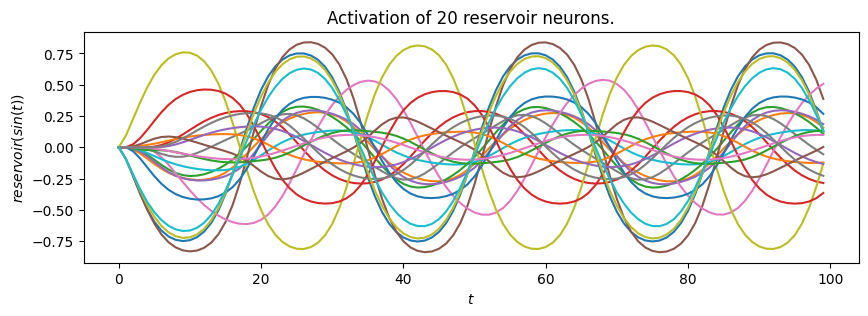

In [7]:
plt.figure(figsize=(10, 3))
plt.title("Activation of 20 reservoir neurons.")
plt.ylabel("$reservoir(sin(t))$")
plt.xlabel("$t$")
plt.plot(states[:, :20])
plt.show()

In [8]:
states = reservoir.run(X)

In [9]:
_ = reservoir.reset()

In [10]:
from reservoirpy.nodes import Ridge

readout = Ridge(ridge=1e-7)

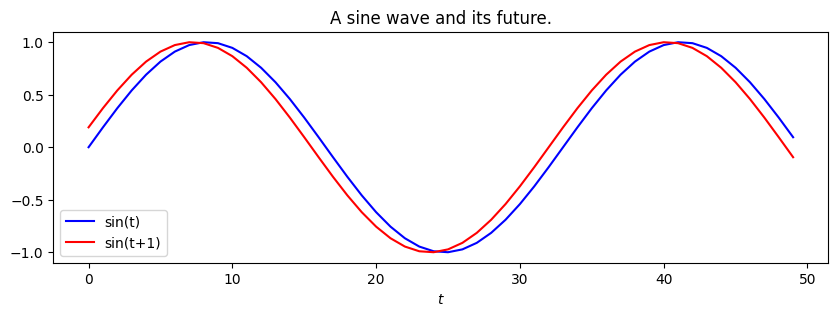

In [11]:
X_train = X[:50]
Y_train = X[1:51]

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(X_train, label="sin(t)", color="blue")
plt.plot(Y_train, label="sin(t+1)", color="red")
plt.legend()
plt.show()

In [12]:
train_states = reservoir.run(X_train)

In [13]:
readout = readout.fit(train_states, Y_train, warmup=10)

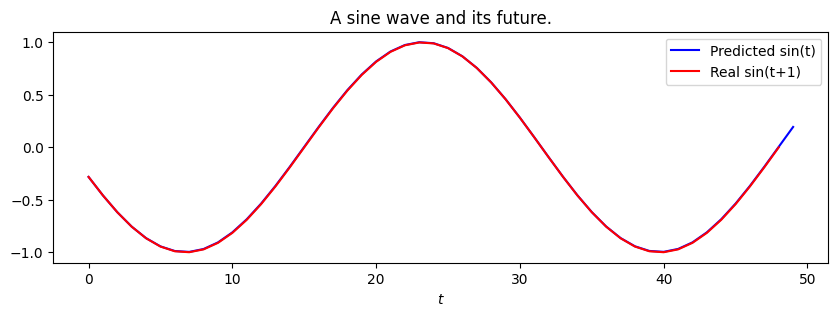

In [14]:
test_states = reservoir.run(X[50:])
Y_pred = readout.run(test_states)

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(Y_pred, label="Predicted sin(t)", color="blue")
plt.plot(X[51:], label="Real sin(t+1)", color="red")
plt.legend()
plt.show()

In [15]:
from reservoirpy.nodes import Reservoir, Ridge

reservoir = Reservoir(100, lr=0.5, sr=0.9)
readout = Ridge(ridge=1e-7)

esn_model = reservoir >> readout

In [16]:
esn_model = esn_model.fit(X_train, Y_train, warmup=10)

In [17]:
print(reservoir.initialized, readout.initialized)

True True


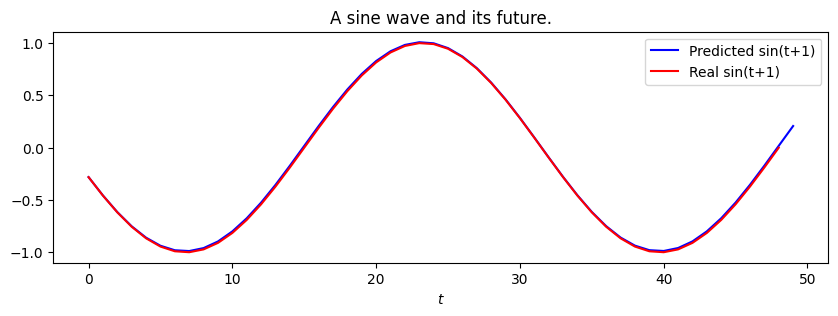

In [ ]:
Y_pred = esn_model.run(X[50:])

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(Y_pred, label="Predicted sin(t+1)", color="blue")
plt.plot(X[51:], label="Real sin(t+1)", color="red")
plt.legend()
plt.show()
